## 10.gyakorlat: Fourier-sorok és barátaik

A gyakorlaton átismételjük a Fourier-sorfejtés elméletét, megismerkedünk a python egyik egyszerű grafikus könyvtárával, és ezt fel is használjuk a négyszögjel Fourier sorának megjelenítésére. Megbeszéljük, hogy mi a különbség a Fourier-transzformáció és a Fourier-sorfejtés között, és megtujduk, hogy hogyan működik a HiFi-k spektrum analizátora és a Shazam. Megtudjuk, hogy mi köze a képeknek a frekvenciához, és rájövünk, hogy a robotok folyamatosan remegnek. 

Ismerkedjünk meg a graphics.py csomaggal! John M. Zelle készítette, hogy legyen egy könnyen használható grafika
könyvtár egy kezdő programozós kurzusán, és széles körben használt egyszerűsége miatt: ha valami egyszerű animációt szeretnétek művelni Pythonban, így a legkönnyebb. A kód, és a hozzá tartozó (rövid!) dokumentáció ezen a címen érhető el: http://mcsp.wartburg.edu/zelle/python/ .


Ha letöltöttétek a .py fájl az oldalról, tegyétek be a kód mappájába, és innentől az alábbi sorral hozzá tudtok férni
a graphics.py függvényeihez:

In [1]:
from graphics import *

Ahogy a C++-os grafikában megszokhattuk, szükségünk lesz egy ablakra, amire rajzolhatunk. Így tudunk ablakot csinálni:

In [ ]:
win = GraphWin("My_window", 600,400)

Megjelent az ablakunk, de eltünni nem akar (legalábbis nekem Ubuntun). El is kéne tüntetni valahogy!

In [ ]:
win = GraphWin("My_Window", 600, 400) 
win.close()

Lássunk két módszert arra, hogy hogyan lehet megoldani a problémát:

In [2]:
win =GraphWin("Fourier", 600, 400)
win.getMouse()
win.close()


In [3]:
win = GraphWin("My_Window", 600, 400)
while win.checkMouse()==None:
    t="ide írhatjuk a kódot. Ha nem tudjuk, hogy mikor fogjuk abbhagyni a futást, ezt használjuk"
win.close()
#mire lesz még szükség? Tudnunk kell:
#pontokat rajzolni
#egyeneseket rajzolni
#köröket rajzolni
#és az egészet akkor, és olyan gyakorisággal letörölni, ahogy tetszik. A többi már csak matek!

In [3]:
win =GraphWin("Fourier", 600, 400)
win.setBackground("black")

pont=Point(200,200)#pont objektum: x,y koordináták megadásával
pont.setFill(color_rgb(69,14,88)) #színt így is állíthatjuk

pont.draw(win)

kor=Circle(pont,3)
kor.setFill("white") #outline és fill között
kor.draw(win)

kor2=Circle(pont,100)
kor2.setOutline("white") #előtte: mit rontottam el? (alapméretezett: fekete)
kor2.draw(win)

egyenes=Line(pont, Point(300,200))#így belül is lehet, néha így kényelmesebb
egyenes.setOutline("white")
egyenes.draw(win)

win.getMouse()
win.close()

In [1]:
from graphics import *
import numpy as np


 
win =GraphWin("Fourier", 800, 400, autoflush=False)#animáció készítésénél: ld. Zelle pdf-je!
win.setBackground("black")

t=0 #legyen egy változónk az időhöz: a cos, sin függvényebe ezt fgojuk beletenni
radius = 100; #kör sugara
center=Point(250,200) #ez legyen a kp


while win.checkMouse()==None: #azért nem az egyszerűbb megoldást használjuk,mert nem tudjuk, meddig néznénk a kört
    if(t>np.pi*2):
        t=0
    
    win.delete("all")#letöröljük az előző képkockát
    x=center.x#kör megrajzolása
    y=center.y
    
    point_1=Point(x,y)
    circ = Circle(point_1,radius)
    circ.setOutline("white")
    circ.draw(win)
    
    x+=radius*np.cos(t)#forgó pont koordinátái
    y+=radius*-np.sin(t)
    
    
        
    point_2=Point(x,y)#ez lesz a forgó pont
        
    radius_show= Line(point_1, point_2)#sugár megrajzolása
    radius_show.setFill("white")
    radius_show.draw(win)
            
    t+=0.02
    update(20) #magyarázat a pdf-ben.
     
win.close()

In [2]:
from graphics import *
import numpy as np


t=0
wave=[]
win =GraphWin("Fourier", 800, 400, autoflush=False)
win.setBackground("black")

radius = 100;
center=Point(250,200)


while win.checkMouse()==None:
    win.delete("all")
    x=center.x
    y=center.y
    point_1=Point(x,y)
    
    x+=radius*np.cos(t)
    y+=radius*-np.sin(t)
    wave.insert(0,y)
    
    circ = Circle(point_1,radius)
    circ.setOutline("white")
    circ.draw(win)
        
    point_2=Point(x,y)
        
    radius_show= Line(point_1, point_2)
    radius_show.setFill("white")
    radius_show.draw(win)
    
    if len(wave)>250:
        del(wave[-1])
    
    line=Line(point_2,Point(500,wave[0]))
    line.setFill("white")
    line.draw(win)
    
    for i in range (len(wave)):
        point=Point(i+500, wave[i])
        point.setFill("white")
        point.draw(win)
            
    t+=0.02
    update(20)
     
win.close()

In [1]:
from graphics import *
import numpy as np


t=0
wave=[]
win =GraphWin("Fourier", 800, 400, autoflush=False)
win.setBackground("black")

radius = 100;
center=Point(250,200)


while win.checkMouse()==None:
    win.delete("all")
    x=center.x
    y=center.y
    for i in range (10):
        n=2*i+1
        point_1=Point(x,y)
        
        circ = Circle(Point(x,y),radius/n)
        circ.setOutline("white")
        circ.draw(win)
        x+=radius/n*np.cos(t*n)
        y+=-radius/n*np.sin(t*n)
        
        point_2=Point(x,y)
        
        radius_show= Line(point_1, point_2)
        radius_show.setFill("white")
        radius_show.draw(win)
    
    wave.insert(0,y)
    if len(wave)>250:
        del(wave[-1])
    
    line=Line(point_2,Point(500,wave[0]))
    line.setFill("white")
    line.draw(win)
    
    for i in range (len(wave)):
        point=Point(i+500, wave[i])
        point.setFill("white")
        point.draw(win)
            
    t+=0.02
    update(20)
     
win.close()

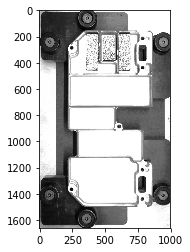

(1660, 1000, 3)
[463.02571811-1981.602368j   0.           +0.j
   0.           +0.j      ]


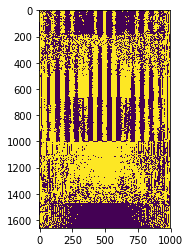

[[ True  True False ... False False  True]
 [ True  True False ... False False  True]
 [ True  True False ... False False  True]
 ...
 [ True False  True ... False  True False]
 [ True False  True ... False  True False]
 [ True False  True ... False  True False]]


In [20]:
#fft használata képeken - 2D fft


import matplotlib.pyplot as plt
import numpy as np
import cv2

path_to_img='/media/fbenedek/Benedek/A1/Robotizálunk/Nolato_kepfelismeres/Programok/houghlines3.jpg'
img=cv2.imread(path_to_img)

%matplotlib inline
plt.imshow(img)
plt.show()

img_fft=np.fft.fft2(img)
print(np.shape(img_fft))
print(img_fft[500,200,:])

mask=np.real(img_fft[:,:,0])>100
#img_masked=np.where(img,mask)
plt.imshow(mask)
plt.show()
print(mask)